Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

In [ ]:
pip install folium

In [1]:
import numpy as np 
import folium
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Dataset provided by Seoul Metropolitan Govt to Kggle as public dataset.
#Dataset link- https://www.kaggle.com/bappekim/air-pollution-in-seoul
measure_df = pd.read_csv('air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
serverity_df = pd.read_csv('air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv')

In [25]:
df_station = pd.read_csv('air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv')

In [3]:
measure_df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
#Now we break measurement date into date and time columns 

date_time = measure_df['Measurement date'].str.split(" ", n=1, expand=True)
measure_df['date'] = date_time[0]
measure_df['time'] = date_time[1]
measure_df = measure_df.drop(['Measurement date'], axis=1)

In [6]:
measure_df[["SO2","NO2","O3","CO","PM10","PM2.5"]].describe()

#Now we see that the min value in all columns is showing -1, this might have occured due to some error in the equipment used for measuring


,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [7]:
print("-1 Values in all columns")
print("Total Rows : ", measure_df.shape)
print("SO2   : ",measure_df[measure_df.SO2 == -1].shape[0])
print("NO2   : ",measure_df[measure_df.NO2 == -1].shape[0])
print("CO    : ",measure_df[measure_df.CO == -1].shape[0])
print("O3    : ",measure_df[measure_df.O3 == -1].shape[0])
print("PM10  : ",measure_df[measure_df.PM10 == -1].shape[0])
print("PM2.5 : ",measure_df[measure_df['PM2.5'] == -1].shape[0])

-1 Values in all columns
Total Rows :  (647511, 12)
SO2   :  3976
NO2   :  3834
CO    :  4036
O3    :  4059
PM10  :  3962
PM2.5 :  3973


In [8]:
#SimpleImputer can be used to replace the -1 values with the mean value of each column

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-1, strategy='mean')
df_imputed = pd.DataFrame(imp.fit_transform(measure_df[["SO2","NO2","O3","CO","PM10","PM2.5"]]))
df_imputed.columns = measure_df[["SO2","NO2","O3","CO","PM10","PM2.5"]].columns
df_imputed.index = measure_df.index
remain_df = measure_df[measure_df.columns.difference(["SO2","NO2","O3","CO","PM10","PM2.5"])]
df = pd.concat([remain_df, df_imputed], axis=1)
df.head()

,Address,Latitude,Longitude,Station code,date,time,SO2,NO2,O3,CO,PM10,PM2.5
0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,101,2017-01-01,00:00,0.004,0.059,0.002,1.2,73.0,57.0
1,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,101,2017-01-01,01:00,0.004,0.058,0.002,1.2,71.0,59.0
2,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,101,2017-01-01,02:00,0.004,0.056,0.002,1.2,70.0,59.0
3,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,101,2017-01-01,03:00,0.004,0.056,0.002,1.2,70.0,58.0
4,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,101,2017-01-01,04:00,0.003,0.051,0.002,1.2,69.0,61.0


In [9]:
#Now we compute to get the mean values for each day by taking average of all values for that particular day

df_mean_date = df.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_mean_date['date'] = pd.to_datetime(df_mean_date.date)
df_mean_date.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.005301,0.046479,0.004186,0.984364,77.276639,56.817625
1,2017-01-02,0.006055,0.039389,0.016541,0.896396,109.393278,77.971209
2,2017-01-03,0.005624,0.042160,0.013345,0.766489,78.771583,51.666209
3,2017-01-04,0.005796,0.050528,0.008626,0.881031,55.041639,34.577625
4,2017-01-05,0.004796,0.035606,0.011432,0.658864,36.321639,22.212625


C:\Users\Gowri\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


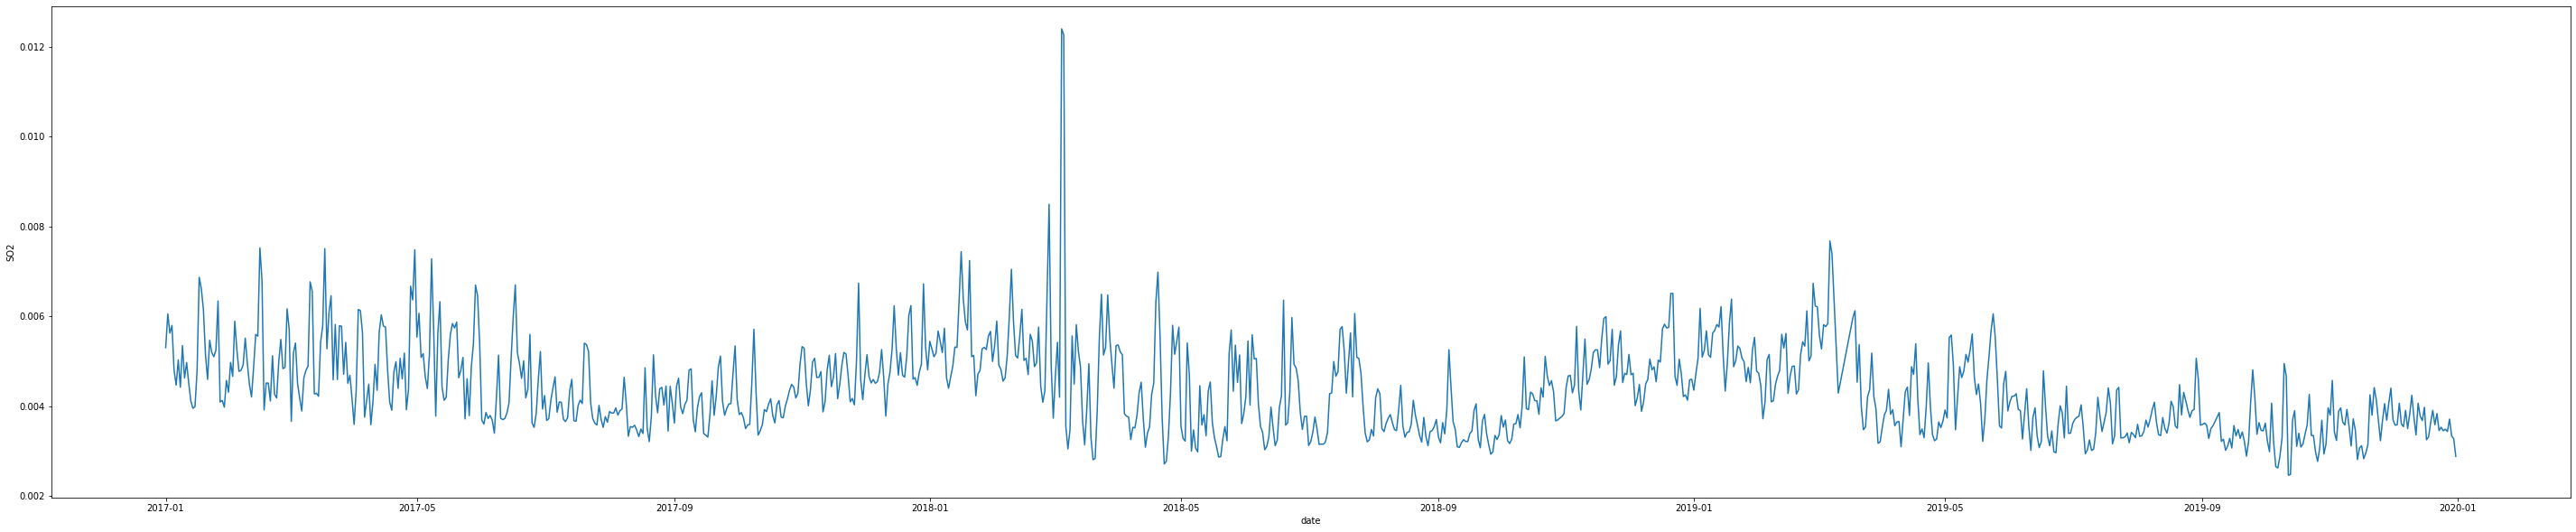

In [10]:
plt.figure(figsize=(50,10)) 
sns.lineplot(data=df_mean_date, x='date',y='SO2')

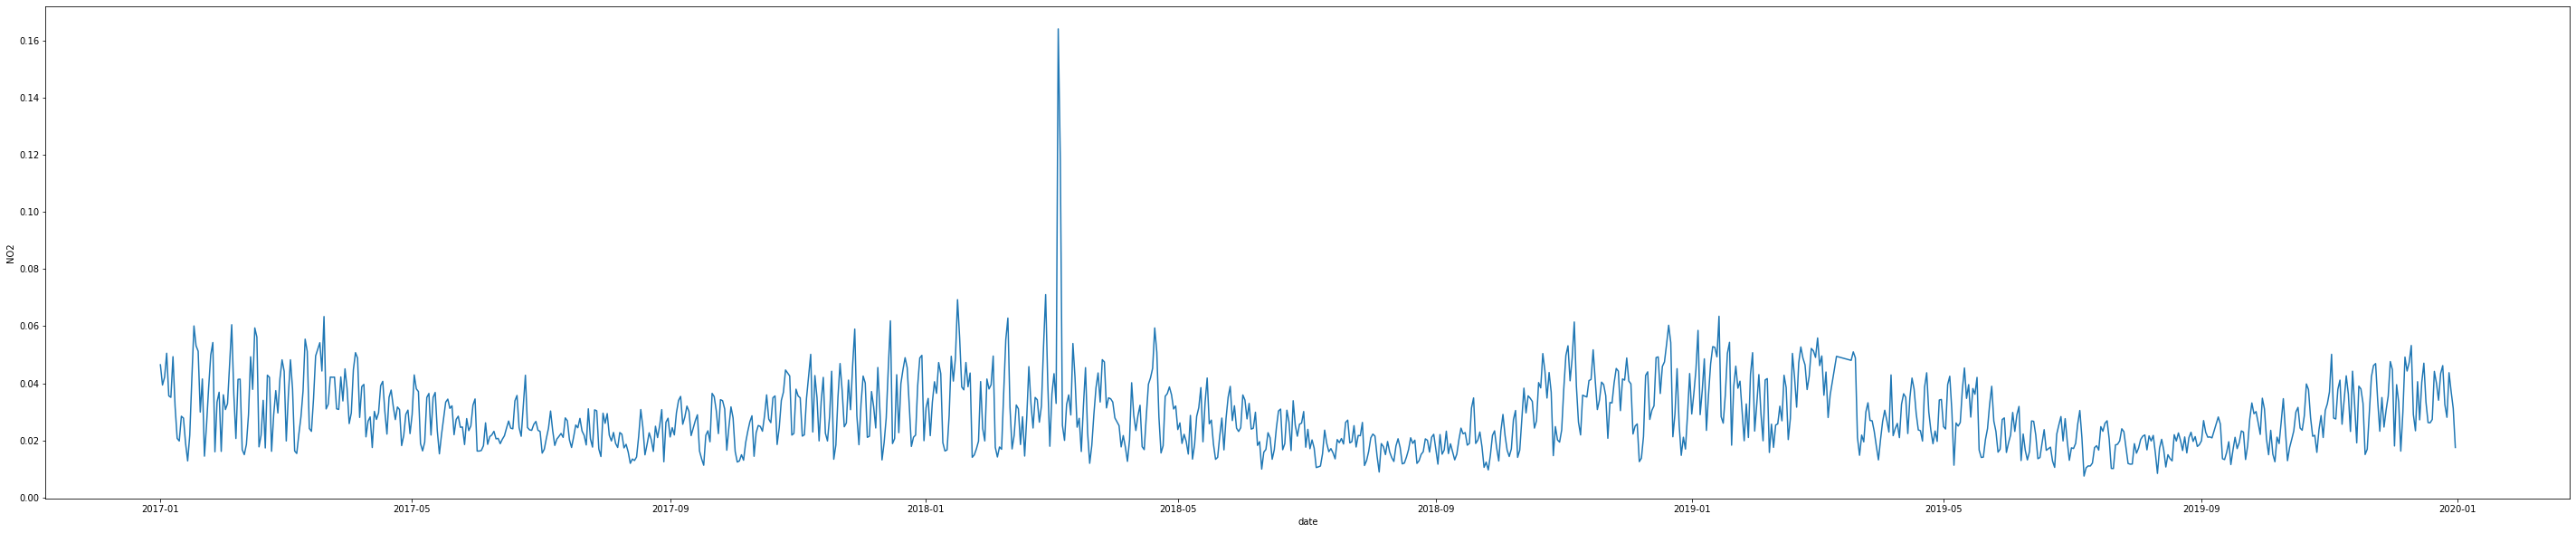

In [11]:
plt.figure(figsize=(50,10)) 
sns.lineplot(data=df_mean_date, x='date',y='NO2')

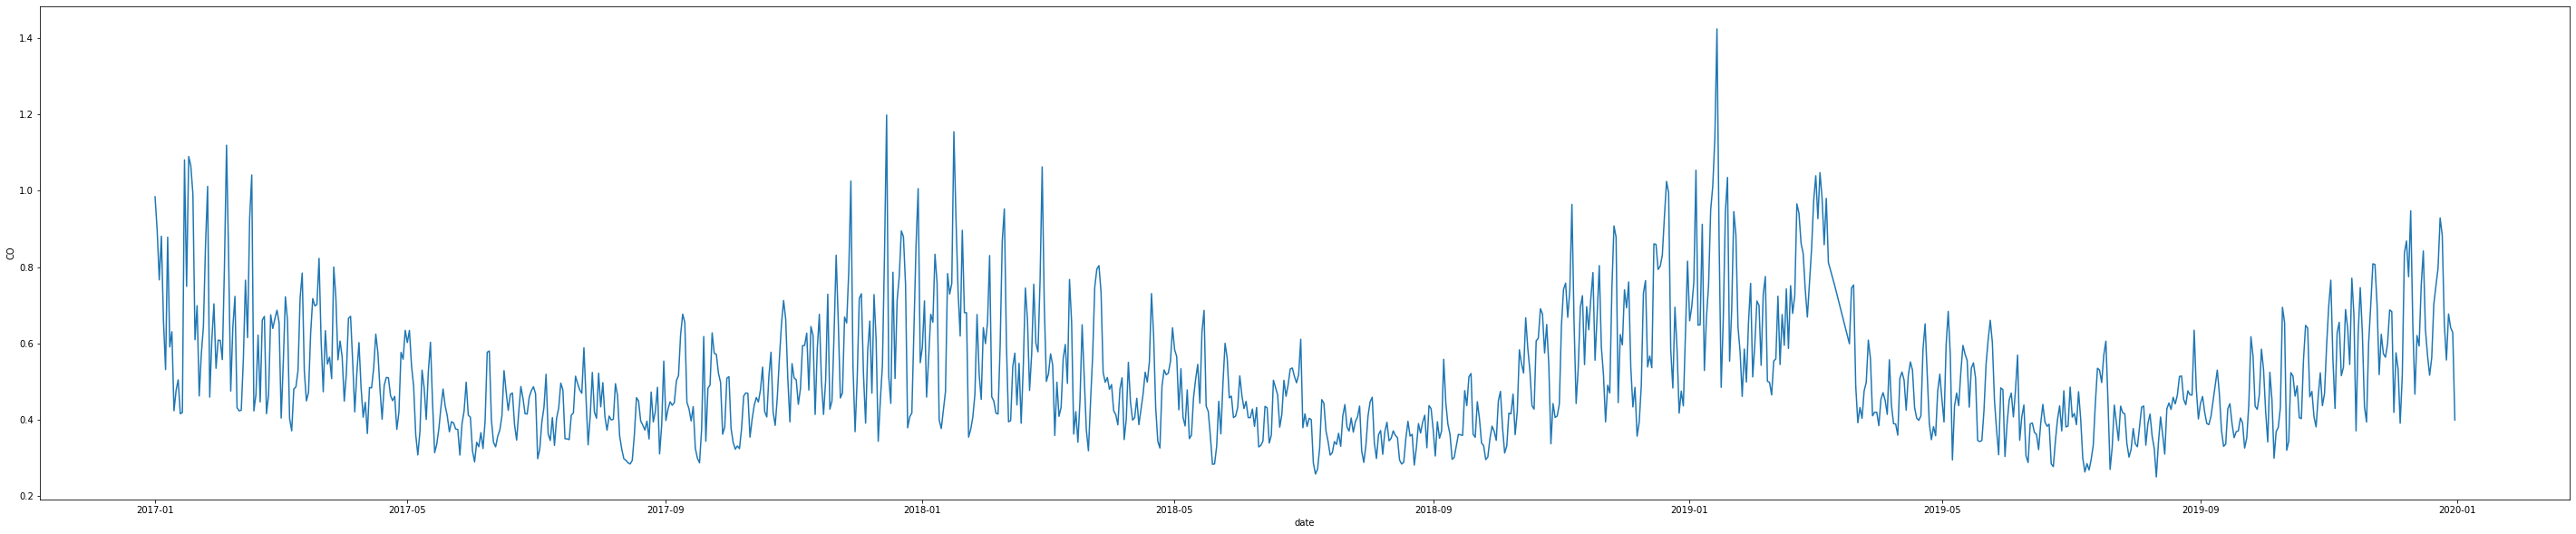

In [12]:
plt.figure(figsize=(50,10)) 
sns.lineplot(data=df_mean_date, x='date',y='CO')

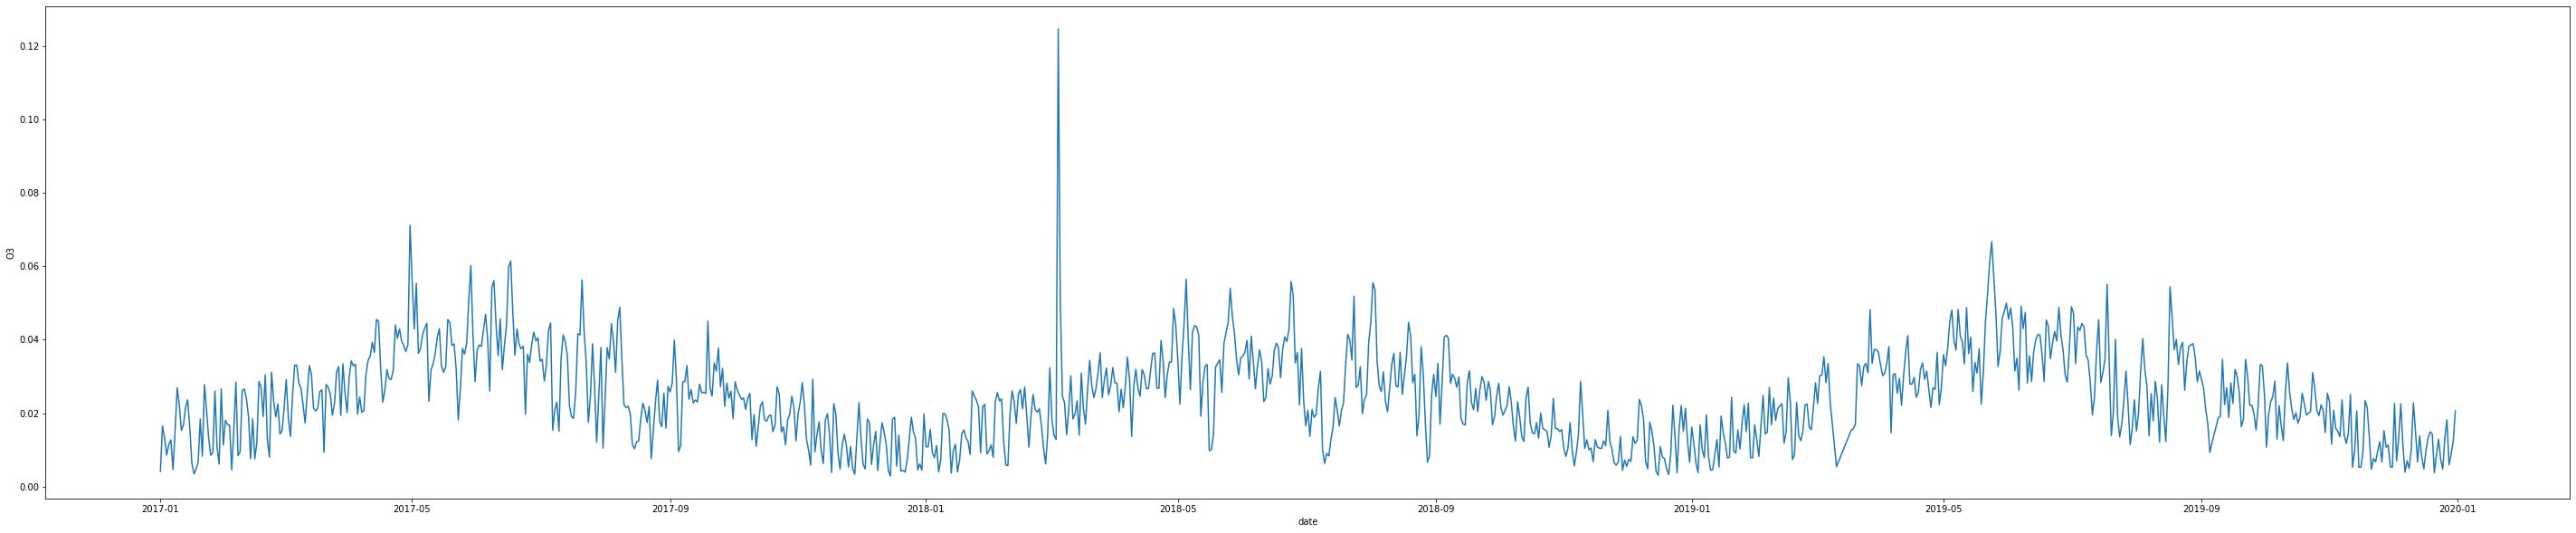

In [13]:
plt.figure(figsize=(50,10)) 
sns.lineplot(data=df_mean_date, x='date',y='O3')

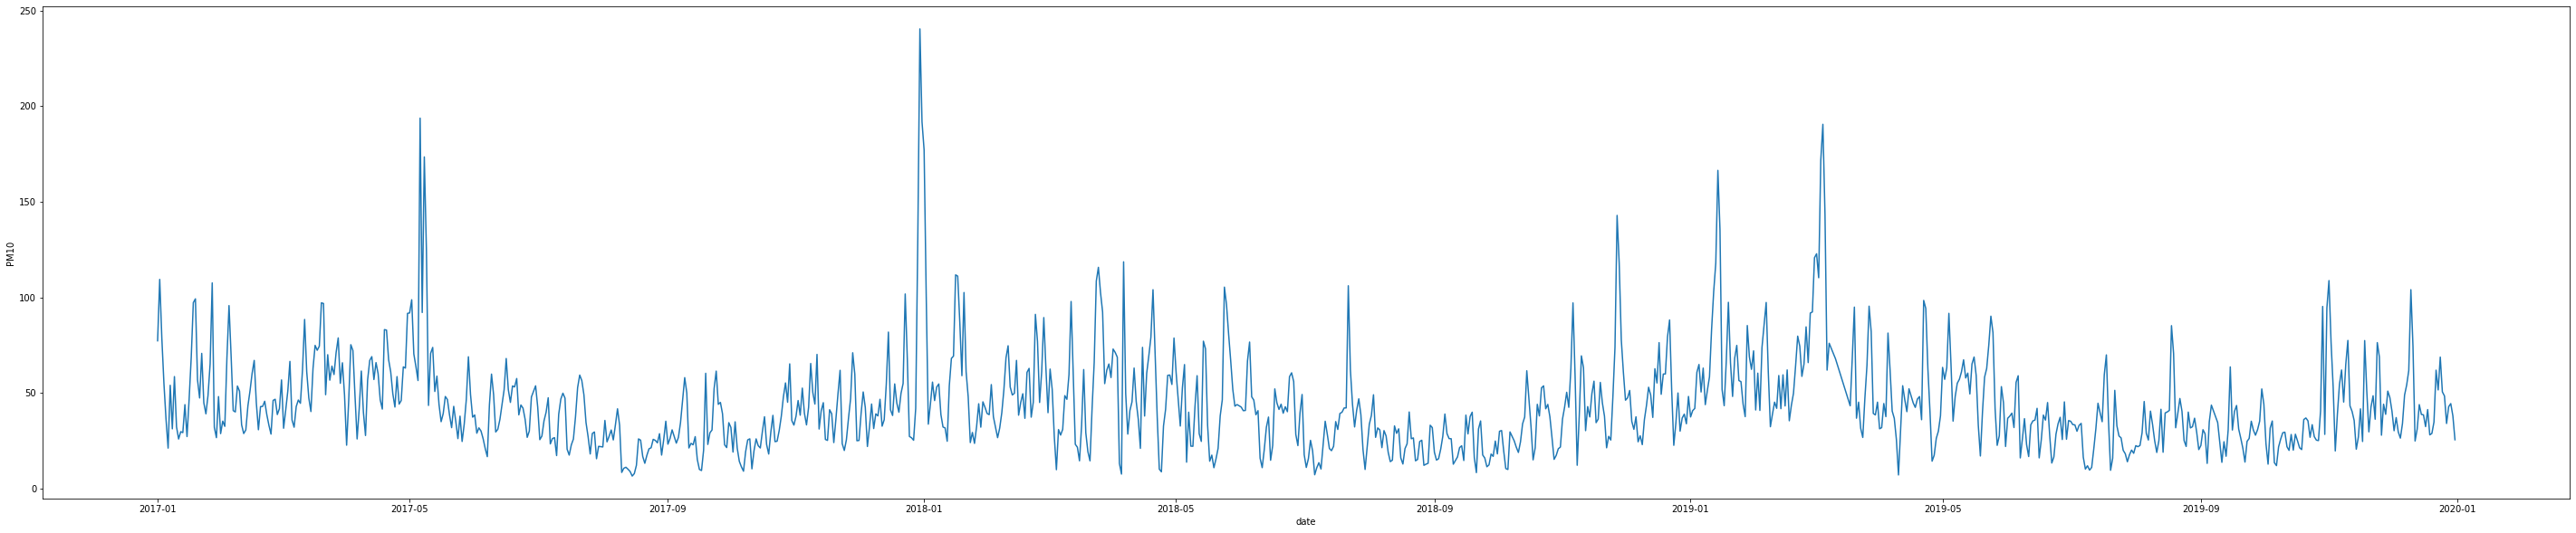

In [14]:
plt.figure(figsize=(50,10)) 
sns.lineplot(data=df_mean_date, x='date',y='PM10')

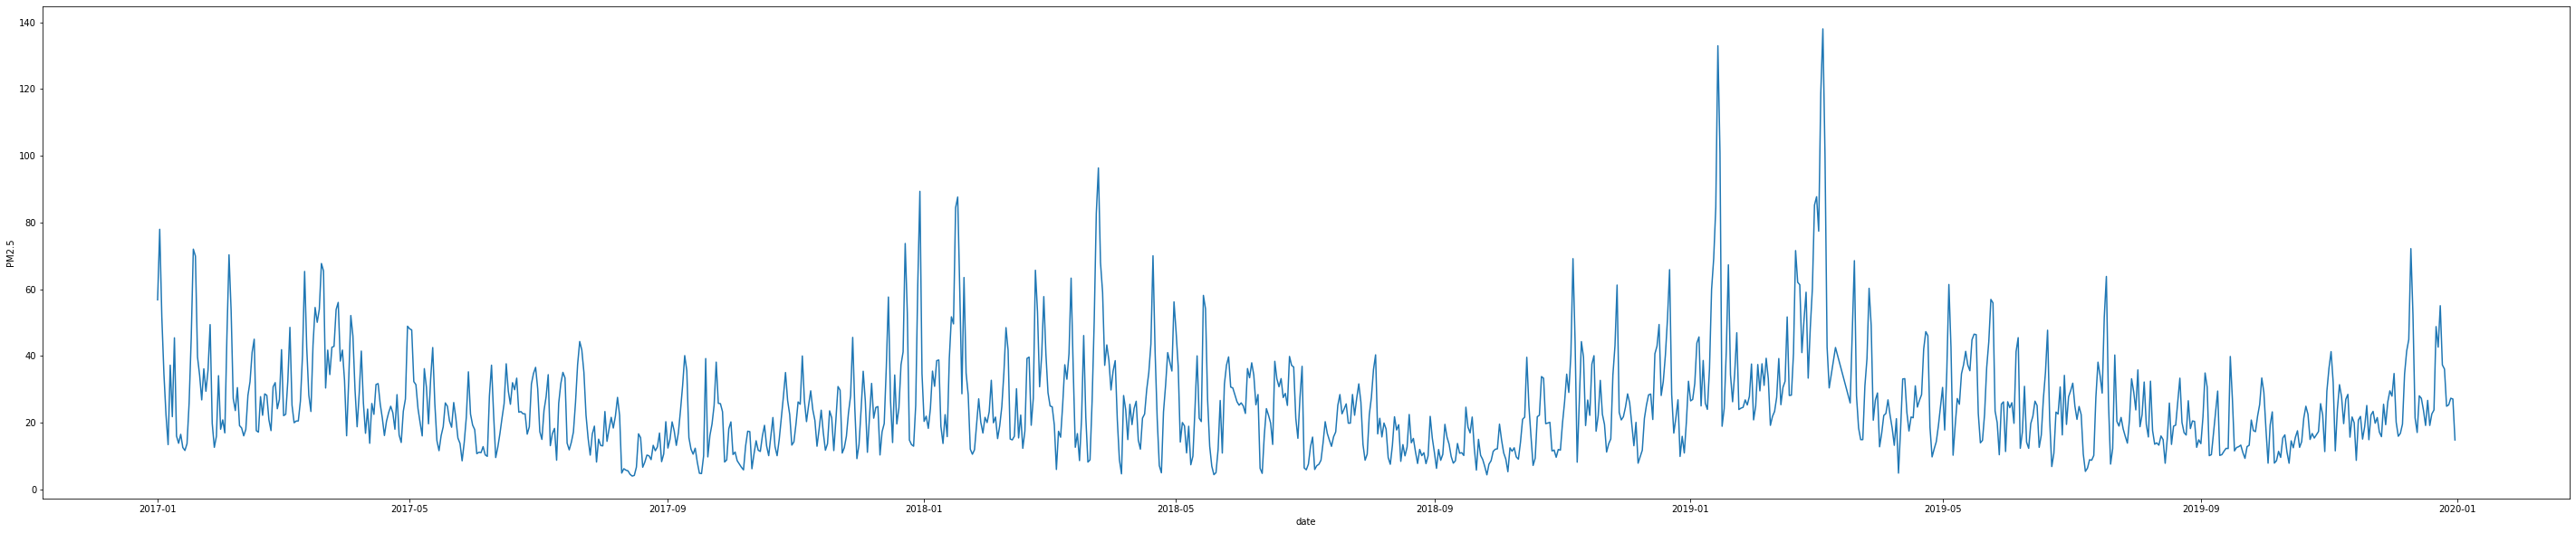

In [15]:
plt.figure(figsize=(50,10)) 
sns.lineplot(data=df_mean_date, x='date',y='PM2.5')

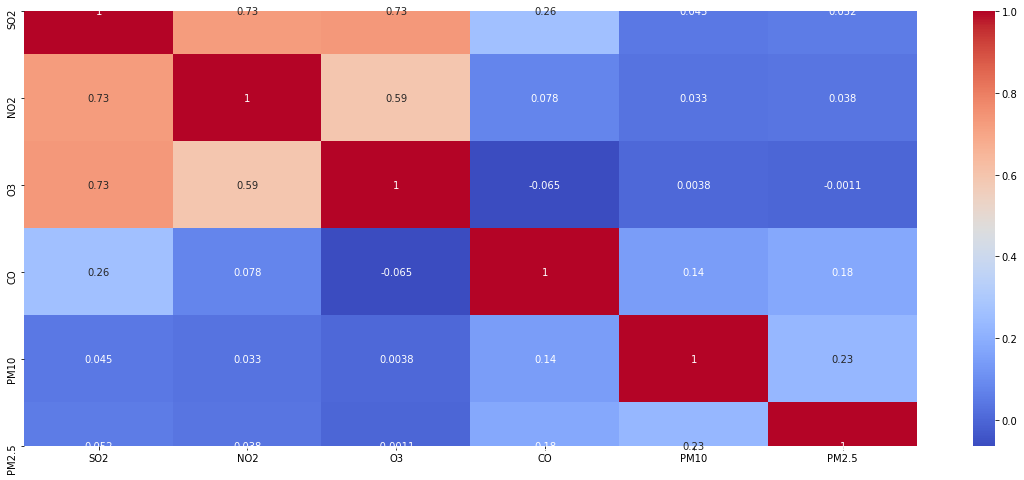

In [16]:
plt.figure(figsize = (20,8))        
sns.heatmap(df[["SO2","NO2","O3","CO","PM10","PM2.5"]].corr(),annot=True, cmap = 'coolwarm')

#Now here we observe that SO2,NO2 and O3 are highly correlated 

In [17]:
main_df = pd.read_csv('air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
except_date_df = df[df.columns.difference(["date","time"])]
main_df['Measurement date'] = pd.to_datetime(main_df['Measurement date'])
main_df = pd.concat([main_df['Measurement date'], except_date_df], axis=1)
main_df['hour'] = main_df['Measurement date'].apply(lambda x: x.hour)
main_df['month'] = main_df['Measurement date'].apply(lambda x: x.month)
main_df['day'] = main_df['Measurement date'].apply(lambda x: x.day)
main_df['week'] = main_df['Measurement date'].apply(lambda x: x.week)
main_df['year'] = main_df['Measurement date'].apply(lambda x: x.year)
main_df.head()

,Measurement date,Address,CO,Latitude,Longitude,NO2,O3,PM10,PM2.5,SO2,Station code,hour,month,day,week,year
0,2017-01-01 00:00:00,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",1.2,37.572016,127.005007,0.059,0.002,73.0,57.0,0.004,101,0,1,1,52,2017
1,2017-01-01 01:00:00,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",1.2,37.572016,127.005007,0.058,0.002,71.0,59.0,0.004,101,1,1,1,52,2017
2,2017-01-01 02:00:00,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",1.2,37.572016,127.005007,0.056,0.002,70.0,59.0,0.004,101,2,1,1,52,2017
3,2017-01-01 03:00:00,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",1.2,37.572016,127.005007,0.056,0.002,70.0,58.0,0.004,101,3,1,1,52,2017
4,2017-01-01 04:00:00,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",1.2,37.572016,127.005007,0.051,0.002,69.0,61.0,0.003,101,4,1,1,52,2017


In [18]:
main_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
main_df_2017 = main_df.loc[main_df['year'] == 2017]
main_df_2018 = main_df.loc[main_df['year'] == 2018]
main_df_2019 = main_df.loc[main_df['year'] == 2019]

In [20]:
from folium.plugins import HeatMap
def generateBaseMap(default_location=[37.572016, 127.005007], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [21]:
base_map = generateBaseMap()
HeatMap(data=main_df[['Latitude', 'Longitude', 'PM2.5']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

In [22]:
df_year_list = []
for year in main_df.year.sort_values().unique():
    df_year_list.append(main_df.loc[main_df.year == year, ['Latitude', 'Longitude', 'PM2.5']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist())
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_year_list, radius=70, gradient={0.05: 'blue', 0.5: 'green', 0.75: 'yellow', 1.0: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [23]:
df_month_list_2017 = []
for month in main_df_2017.month.sort_values().unique():
    df_month_list_2017.append(main_df_2017.loc[main_df_2017.month == month, ['Latitude', 'Longitude', 'PM2.5']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist())
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_month_list_2017, radius=70, gradient={0.05: 'blue', 0.5: 'green', 0.75: 'yellow', 1.0: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [24]:
df_week_list_2017 = []
for week in main_df_2017.week.sort_values().unique():
    df_week_list_2017.append(main_df_2017.loc[main_df_2017.week == week, ['Latitude', 'Longitude', 'PM2.5']].groupby(['Latitude', 'Longitude']).mean().reset_index().values.tolist())
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_week_list_2017, radius=50, gradient={0.05: 'blue', 0.5: 'green', 0.75: 'yellow', 1.0: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map